In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('d:/jupyter/datasets/Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(x)

In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, sigma=1, learning_rate=0.5, input_len=15)     #input_length is the number of features + 1

In [6]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

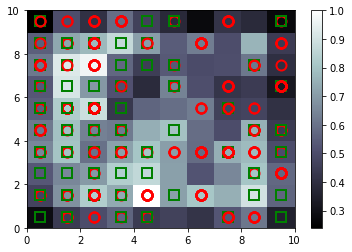

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()


In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,1)],mappings[(2,7)]),axis=0)
frauds = sc.inverse_transform(frauds)

In [11]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15648069
15694666
15593959
15629750
15605872
15592999
15593834
15609987
15721504
15636454
15611682
15608916
15597709
15642934
15724851
15567860
15689786
15670646
15625311
15676156
15604130
15668889
15604196
15660871


## Unsupervised to Supervised hybrid

In [12]:
customers = dataset.iloc[:,1:].values

In [13]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1


In [15]:
is_fraud[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customers = sc.fit_transform(customers)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [38]:
ann = Sequential([
    Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15),
    Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
])

In [39]:
ann.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [40]:
ann.fit(customers, is_fraud, batch_size=1, epochs=10, verbose=2)

Epoch 1/10
690/690 - 3s - loss: 0.5244 - accuracy: 0.9565 - 3s/epoch - 4ms/step
Epoch 2/10
690/690 - 2s - loss: 0.2427 - accuracy: 0.9652 - 2s/epoch - 3ms/step
Epoch 3/10
690/690 - 2s - loss: 0.1520 - accuracy: 0.9652 - 2s/epoch - 3ms/step
Epoch 4/10
690/690 - 2s - loss: 0.1303 - accuracy: 0.9652 - 2s/epoch - 3ms/step
Epoch 5/10
690/690 - 2s - loss: 0.1221 - accuracy: 0.9652 - 2s/epoch - 4ms/step
Epoch 6/10
690/690 - 2s - loss: 0.1177 - accuracy: 0.9652 - 2s/epoch - 4ms/step
Epoch 7/10
690/690 - 3s - loss: 0.1145 - accuracy: 0.9652 - 3s/epoch - 4ms/step
Epoch 8/10
690/690 - 2s - loss: 0.1123 - accuracy: 0.9652 - 2s/epoch - 4ms/step
Epoch 9/10
690/690 - 2s - loss: 0.1104 - accuracy: 0.9652 - 2s/epoch - 3ms/step
Epoch 10/10
690/690 - 2s - loss: 0.1087 - accuracy: 0.9652 - 2s/epoch - 3ms/step


In [41]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]



In [42]:
print(y_pred)

[[1.57997850e+07 4.61142417e-06]
 [1.56548590e+07 1.97385507e-05]
 [1.56214230e+07 2.02498595e-05]
 ...
 [1.56179910e+07 2.41267130e-01]
 [1.57160820e+07 2.56301820e-01]
 [1.56737470e+07 2.56301820e-01]]
